### Imports

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import sys
import os

# Add the parent directory of 'notebooks' to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))  # Move one level up
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [2]:
import torch
from pathlib import Path
from solver import Solver
from griddy.griddy_tuna import hit_griddy, SearchMethod
from models.ChromaTransformer import ChromaTransformerModel
from data.data_loader import MirDataProcessor
from utils.model_utils import get_device
from solver import TrialMetric

In [3]:
device = get_device()
print(f"Device is {device}")

Device is cuda


### Data Building

In [4]:
# Initialize the data processor and create data loaders
data_processor = MirDataProcessor(batch_size=256, process_sequential=True, seq_length=16, overlap_sequence=True, use_median=True)
train_loader, test_loader, num_classes = data_processor.build_data_loaders(device="cuda")

Preparing model data...
Loading the combined CSV file...
Separating song IDs, features, and labels...
Scaling features using MinMaxScaler...
Encoding labels using LabelEncoder...
Saving the scaler to c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\data\processed\scaler.pkl...
Saving the label encoder to c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\data\processed\label_encoder.pkl...
Creating sequences of chromagram data within song boundaries...
Splitting data into training and testing sets...
Data preparation complete.
Number of classes determined: 976
Creating TensorDatasets for training and testing data...
Creating DataLoaders for training and testing datasets...
Data loaders are ready for training and testing.


### Training

In [7]:
import torch.nn as nn
import torch.optim as optim

from models.ChromaTransformer import ChromaTransformerModel
# Define model parameters
model = ChromaTransformerModel(input_dim=24, num_classes=num_classes, seq_length=16, d_model=128, dim_feedforward=1024, num_layers=4)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss().to(device)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
solver = Solver(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    scheduler=scheduler,
    train_dataloader=train_loader,
    valid_dataloader=test_loader,
    device="cuda",
    batch_size=256,
    epochs=50,
)

-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 1.5098. Validation Loss: 1.0014.
Training Accuracy: 0.6040. Validation Accuracy: 0.7148.
-----------------------------------
Epoch 2
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.9541. Validation Loss: 0.7924.
Training Accuracy: 0.7235. Validation Accuracy: 0.7684.
-----------------------------------
Epoch 3
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.7996. Validation Loss: 0.6748.
Training Accuracy: 0.7622. Validation Accuracy: 0.7994.
-----------------------------------
Epoch 4
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.7180. Validation Loss: 0.6098.
Training Accuracy: 0.7832. Validation Accuracy: 0.8177.
-----------------------------------
Epoch 5
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.6665. Validation Loss: 0.5732.
Training Accuracy: 0.7971. Validation Accuracy: 0.8265.
-----------------------------------
Epoch 6
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.6303. Validation Loss: 0.5463.
Training Accuracy: 0.8065. Validation Accuracy: 0.8353.
-----------------------------------
Epoch 7
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.6031. Validation Loss: 0.5204.
Training Accuracy: 0.8139. Validation Accuracy: 0.8435.
-----------------------------------
Epoch 8
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5817. Validation Loss: 0.4942.
Training Accuracy: 0.8197. Validation Accuracy: 0.8491.
-----------------------------------
Epoch 9
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5642. Validation Loss: 0.4914.
Training Accuracy: 0.8245. Validation Accuracy: 0.8507.
-----------------------------------
Epoch 10
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5503. Validation Loss: 0.4763.
Training Accuracy: 0.8283. Validation Accuracy: 0.8550.
-----------------------------------
Epoch 11
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5381. Validation Loss: 0.4660.
Training Accuracy: 0.8319. Validation Accuracy: 0.8584.
-----------------------------------
Epoch 12
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5277. Validation Loss: 0.4606.
Training Accuracy: 0.8347. Validation Accuracy: 0.8592.
-----------------------------------
Epoch 13
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5196. Validation Loss: 0.4629.
Training Accuracy: 0.8369. Validation Accuracy: 0.8586.
-----------------------------------
Epoch 14
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5122. Validation Loss: 0.4468.
Training Accuracy: 0.8389. Validation Accuracy: 0.8645.
-----------------------------------
Epoch 15
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.5047. Validation Loss: 0.4347.
Training Accuracy: 0.8411. Validation Accuracy: 0.8669.
-----------------------------------
Epoch 16
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4995. Validation Loss: 0.4368.
Training Accuracy: 0.8427. Validation Accuracy: 0.8670.
-----------------------------------
Epoch 17
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4942. Validation Loss: 0.4188.
Training Accuracy: 0.8443. Validation Accuracy: 0.8718.
-----------------------------------
Epoch 18
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4893. Validation Loss: 0.4213.
Training Accuracy: 0.8455. Validation Accuracy: 0.8707.
-----------------------------------
Epoch 19
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4846. Validation Loss: 0.4240.
Training Accuracy: 0.8470. Validation Accuracy: 0.8705.
-----------------------------------
Epoch 20
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4813. Validation Loss: 0.4092.
Training Accuracy: 0.8478. Validation Accuracy: 0.8750.
-----------------------------------
Epoch 21
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4779. Validation Loss: 0.4378.
Training Accuracy: 0.8485. Validation Accuracy: 0.8700.
-----------------------------------
Epoch 22
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4748. Validation Loss: 0.4253.
Training Accuracy: 0.8496. Validation Accuracy: 0.8715.
-----------------------------------
Epoch 23
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4724. Validation Loss: 0.4082.
Training Accuracy: 0.8504. Validation Accuracy: 0.8756.
-----------------------------------
Epoch 24
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4689. Validation Loss: 0.4067.
Training Accuracy: 0.8513. Validation Accuracy: 0.8769.
-----------------------------------
Epoch 25
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4671. Validation Loss: 0.4147.
Training Accuracy: 0.8520. Validation Accuracy: 0.8744.
-----------------------------------
Epoch 26
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4646. Validation Loss: 0.4220.
Training Accuracy: 0.8528. Validation Accuracy: 0.8734.
-----------------------------------
Epoch 27
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4625. Validation Loss: 0.3971.
Training Accuracy: 0.8532. Validation Accuracy: 0.8784.
-----------------------------------
Epoch 28
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4610. Validation Loss: 0.4091.
Training Accuracy: 0.8537. Validation Accuracy: 0.8764.
-----------------------------------
Epoch 29
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4588. Validation Loss: 0.4060.
Training Accuracy: 0.8542. Validation Accuracy: 0.8777.
-----------------------------------
Epoch 30
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4577. Validation Loss: 0.4061.
Training Accuracy: 0.8546. Validation Accuracy: 0.8778.
-----------------------------------
Epoch 31
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4574. Validation Loss: 0.4119.
Training Accuracy: 0.8548. Validation Accuracy: 0.8763.
-----------------------------------
Epoch 32
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4551. Validation Loss: 0.4149.
Training Accuracy: 0.8552. Validation Accuracy: 0.8765.
-----------------------------------
Epoch 33
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4550. Validation Loss: 0.3961.
Training Accuracy: 0.8556. Validation Accuracy: 0.8797.
-----------------------------------
Epoch 34
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4536. Validation Loss: 0.4055.
Training Accuracy: 0.8559. Validation Accuracy: 0.8794.
-----------------------------------
Epoch 35
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4525. Validation Loss: 0.4256.
Training Accuracy: 0.8562. Validation Accuracy: 0.8750.
-----------------------------------
Epoch 36
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4519. Validation Loss: 0.3937.
Training Accuracy: 0.8564. Validation Accuracy: 0.8819.
-----------------------------------
Epoch 37
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4514. Validation Loss: 0.4136.
Training Accuracy: 0.8566. Validation Accuracy: 0.8775.
-----------------------------------
Epoch 38
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4512. Validation Loss: 0.4078.
Training Accuracy: 0.8566. Validation Accuracy: 0.8779.
-----------------------------------
Epoch 39
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4501. Validation Loss: 0.4067.
Training Accuracy: 0.8571. Validation Accuracy: 0.8787.
-----------------------------------
Epoch 40
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4495. Validation Loss: 0.4128.
Training Accuracy: 0.8570. Validation Accuracy: 0.8773.
-----------------------------------
Epoch 41
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4489. Validation Loss: 0.4052.
Training Accuracy: 0.8573. Validation Accuracy: 0.8776.
-----------------------------------
Epoch 42
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4483. Validation Loss: 0.4099.
Training Accuracy: 0.8573. Validation Accuracy: 0.8785.
-----------------------------------
Epoch 43
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4485. Validation Loss: 0.4201.
Training Accuracy: 0.8575. Validation Accuracy: 0.8744.
-----------------------------------
Epoch 44
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4473. Validation Loss: 0.4167.
Training Accuracy: 0.8579. Validation Accuracy: 0.8766.
-----------------------------------
Epoch 45
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4475. Validation Loss: 0.4054.
Training Accuracy: 0.8578. Validation Accuracy: 0.8799.
-----------------------------------
Epoch 46
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4472. Validation Loss: 0.4089.
Training Accuracy: 0.8579. Validation Accuracy: 0.8785.
-----------------------------------
Epoch 47
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.4477. Validation Loss: 0.4001.
Training Accuracy: 0.8577. Validation Accuracy: 0.8802.
-----------------------------------
Epoch 48
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.3001. Validation Loss: 0.2554.
Training Accuracy: 0.9026. Validation Accuracy: 0.9228.
-----------------------------------
Epoch 49
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.2674. Validation Loss: 0.2431.
Training Accuracy: 0.9131. Validation Accuracy: 0.9265.
-----------------------------------
Epoch 50
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 0.2542. Validation Loss: 0.2305.
Training Accuracy: 0.9171. Validation Accuracy: 0.9303.


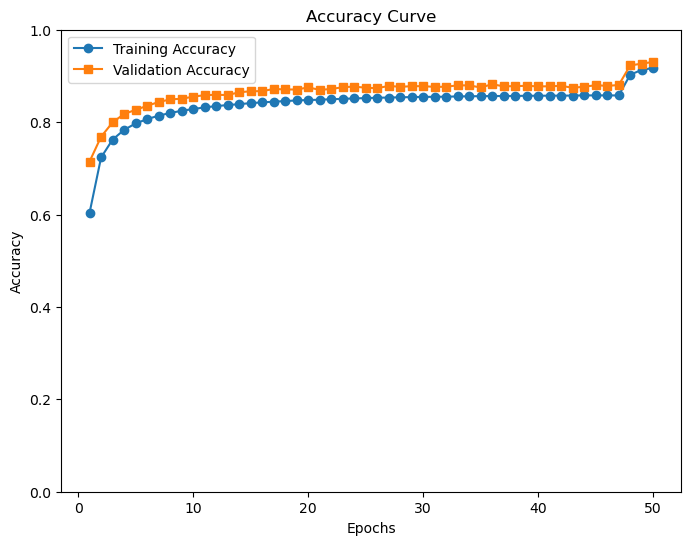

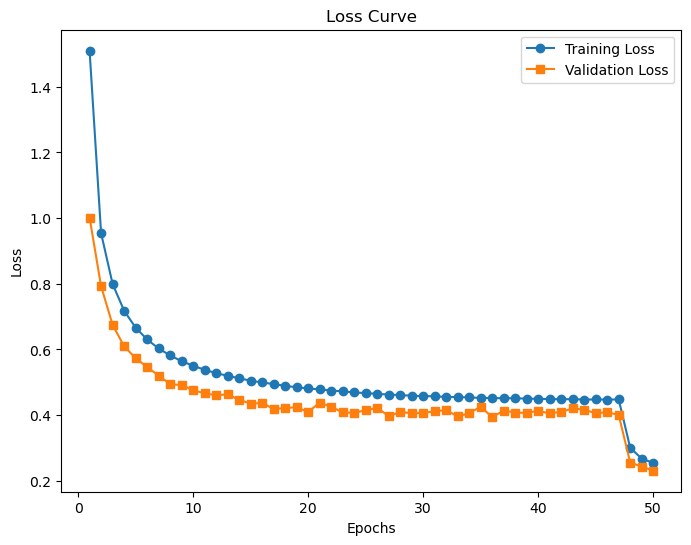

In [8]:
solver.train_and_evaluate(plot_results=True)

In [ ]:
# NOTE: Do not assume these values are anything but trash, they're just here for testing

SOLVER_PARAMS = {
    Solver : {
        "device": device,
        "batch_size": 256,
        "epochs": [5, 10],
        "early_stop_epochs": 3, # early stop after n epochs without improvement, 0 to disable
        "warmup_epochs": 0, # 0 to disable
        "dtype": "float16",
        "train_dataloader": train_loader, # must be DataLoader object
        "valid_dataloader": test_loader, # must be DataLoader object
        "direction": "minimize" # must specify this, even if not used by solver
    }
}

MODEL_PARAMS = {
    ChromaTransformerModel: {
        "input_dim": [24],
        "seq_length": [16],
        "num_classes": [num_classes],
        "dim_feedworward": [256, 512, 1024],
        "d_model": [128, 256],
        "num_layers": [4, 6]
    }
}

OPTIM_PARAMS = {
    torch.optim.SGD : {
        "lr": [0.001, 0.1, SearchMethod.LOG_UNIFORM],
        "momentum": [0.9, 0.99, SearchMethod.UNIFORM],
        "weight_decay": [0.00001],
    },
    torch.optim.Adam : {
        "lr": [0.008, 0.005, 0.001], # this will auto-search as CATEGORICAL
    }
}

SCHED_PARAMS = {
    torch.optim.lr_scheduler.CosineAnnealingWarmRestarts : {
        "T_0": [10],
    },
    torch.optim.lr_scheduler.StepLR : {
        "step_size": [5, 10, 15],
        "gamma" : [0.1, 0.05],
    }
}

CRITERION_PARAMS = {
    torch.nn.CrossEntropyLoss : {}
}

PARAM_SET = {
    "solver": SOLVER_PARAMS,
    "model" : MODEL_PARAMS,
    "optim" : OPTIM_PARAMS,
    "sched" : SCHED_PARAMS,
    "criterion" : CRITERION_PARAMS,
}

### Griddy

In [6]:
my_study = "chroma_transformer"

output_folder = Path("griddy")

solver_reference = hit_griddy(my_study, param_set=PARAM_SET, out_dir=output_folder, n_trials=30, n_jobs=1, prune=False, resume=False, trial_metric=TrialMetric.ACCURACY)
# NOTE: modest values of n_trials and n_jobs set here for testing, set your values accordingly

"Hitting the griddy..." -Ellie


[I 2024-12-08 17:46:29,229] A new study created in RDB with name: chroma_transformer
c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\griddy\griddy_tuna.py:127: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  return trial.suggest_loguniform(name, min(values), max(values))
c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\griddy\griddy_tuna.py:125: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  return trial.suggest_uniform(name, min(values), max(values))


-----------------------------------
Epoch 1
-----------------------------------


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

Training Loss: 1.8452. Validation Loss: 1.4233.
Training Accuracy: 0.5426. Validation Accuracy: 0.6201.
-----------------------------------
Epoch 2
-----------------------------------


c:\Users\maxwe\anaconda3\envs\amadeus-ex-machina\Lib\site-packages\torch\optim\lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Training:   0%|          | 0/12893 [00:00<?, ?it/s]

[W 2024-12-08 19:30:42,200] Trial 0 failed with parameters: {'optim_class': 'SGD', 'SGD_lr': 0.03604671405194837, 'SGD_momentum': 0.9121409282628447, 'sched_class': 'StepLR', 'StepLR_step_size': 5, 'StepLR_gamma': 0.1, 'epochs': 5} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\maxwe\anaconda3\envs\amadeus-ex-machina\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\griddy\griddy_tuna.py", line 61, in objective
    best_metric = solver.train_and_evaluate(trial, trial_metric=trial_metric)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maxwe\OneDrive\Documents\amadeus-ex-machina\solver.py", line 142, in train_and_evaluate
    self.optimizer.step()
  File "c:\Users\maxwe\anaconda3\envs\amadeus-ex-machina\Lib\site-packages\torch\optim\lr_s

KeyboardInterrupt: 

### Inference

In [10]:
from utils.model_utils import run_sequential_chroma_inference

scaler = data_processor.scaler
label_encoder = data_processor.label_encoder
chroma_path = "C:/Users/maxwe/OneDrive/Documents/amadeus-ex-machina/data/raw/McGill-Billboard/1300/bothchroma.csv"

# Run inference using the trained model
run_sequential_chroma_inference(
    chroma_path,
    model,
    scaler,
    label_encoder,
)

Chord annotations saved to output_annotations.lab


### Model Evauluation

In [50]:
from utils.chord_eval import compute_chord_annotation_scores

In [51]:
ref_lab_fpath = "C:/Users/maxwe/OneDrive/Documents/amadeus-ex-machina/data/raw/McGill-Billboard/1300/full.lab"
est_lab_fpath = "C:/Users/maxwe/OneDrive/Documents/amadeus-ex-machina/notebooks/chroma_transformer/output_annotations.lab"

scores = compute_chord_annotation_scores(ref_lab_fpath, est_lab_fpath)
scores

OrderedDict([('thirds', 0.9875517258565112),
             ('thirds_inv', 0.9875517258565112),
             ('triads', 0.9873814746828633),
             ('triads_inv', 0.9873814746828633),
             ('tetrads', 0.9788213117175592),
             ('tetrads_inv', 0.9788213117175592),
             ('root', 0.9885739667396645),
             ('mirex', 0.988590173624018),
             ('majmin', 0.9876694342092982),
             ('majmin_inv', 0.9876694342092982),
             ('sevenths', 0.9788331955378964),
             ('sevenths_inv', 0.9788331955378964),
             ('underseg', 0.985125008190127),
             ('overseg', 0.8531929963671957),
             ('seg', 0.8531929963671957)])